<a href="https://colab.research.google.com/github/hunttrevor/myProjects/blob/master/stock_forecasting_via_facebook_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
!pip install prophet
from prophet import Prophet
import pandas as pd
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv('PLAY.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,38.257048,39.249425,37.323956,38.297460,38.297460,1.202193e+06
std,4.480591,4.496591,4.422021,4.488015,4.488015,7.224423e+05
min,29.879999,31.580000,29.597000,30.139999,30.139999,3.941000e+05
25%,34.877499,35.824998,33.867500,34.860001,34.860001,7.897000e+05
50%,38.034999,39.037000,37.149999,38.090000,38.090000,1.029350e+06
75%,41.519998,42.462501,40.515000,41.487501,41.487501,1.357725e+06
max,49.930000,52.535000,49.099998,49.910000,49.910000,6.618800e+06


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.line(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.box(df, y="Close")

## Data Preparation

In [ ]:
columns=['Date', 'Close']
ndf= pd.DataFrame(df, columns = columns)

In [ ]:
  ndf.head()

,Date,Close
0,2021-10-29,37.130001
1,2021-11-01,38.160000
2,2021-11-02,36.959999
3,2021-11-03,38.639999
4,2021-11-04,37.779999


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})


In [ ]:
prophet_df.head()

,ds,y
0,2021-10-29,37.130001
1,2021-11-01,38.160000
2,2021-11-02,36.959999
3,2021-11-03,38.639999
4,2021-11-04,37.779999


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5_9qeggn/br00wr4b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5_9qeggn/hcaghiup.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67710', 'data', 'file=/tmp/tmp5_9qeggn/br00wr4b.json', 'init=/tmp/tmp5_9qeggn/hcaghiup.json', 'output', 'file=/tmp/tmp5_9qeggn/prophet_model9l6_ff53/prophet_model-20221029193157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:31:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-29,35.819109,30.176679,40.059657,35.819109,35.819109,-0.449566,-0.449566,-0.449566,-0.449566,-0.449566,-0.449566,0.0,0.0,0.0,35.369543
1,2021-11-01,35.931453,30.708779,40.326016,35.931453,35.931453,-0.513852,-0.513852,-0.513852,-0.513852,-0.513852,-0.513852,0.0,0.0,0.0,35.417601
2,2021-11-02,35.968901,31.014554,40.629508,35.968901,35.968901,-0.205652,-0.205652,-0.205652,-0.205652,-0.205652,-0.205652,0.0,0.0,0.0,35.763248
3,2021-11-03,36.006349,31.606778,41.009889,36.006349,36.006349,0.116219,0.116219,0.116219,0.116219,0.116219,0.116219,0.0,0.0,0.0,36.122567
4,2021-11-04,36.043796,30.918961,40.678779,36.043796,36.043796,-0.221898,-0.221898,-0.221898,-0.221898,-0.221898,-0.221898,0.0,0.0,0.0,35.821899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-11-23,34.204183,29.631121,39.206171,34.094634,34.302343,0.116219,0.116219,0.116219,0.116219,0.116219,0.116219,0.0,0.0,0.0,34.320402
278,2022-11-24,34.172654,28.835373,38.647298,34.053278,34.277094,-0.221898,-0.221898,-0.221898,-0.221898,-0.221898,-0.221898,0.0,0.0,0.0,33.950756
279,2022-11-25,34.141125,28.548300,38.959067,34.011448,34.252309,-0.449566,-0.449566,-0.449566,-0.449566,-0.449566,-0.449566,0.0,0.0,0.0,33.691559
280,2022-11-26,34.109596,29.942170,39.219768,33.969391,34.226869,0.637375,0.637375,0.637375,0.637375,0.637375,0.637375,0.0,0.0,0.0,34.746971


In [ ]:
px.line(forecast, x='ds', y='yhat')

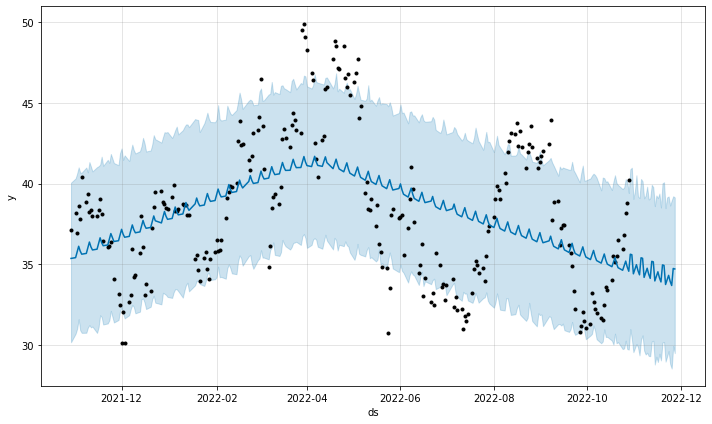

In [ ]:
figure = m.plot(forecast,xlabel='ds', ylabel='y')

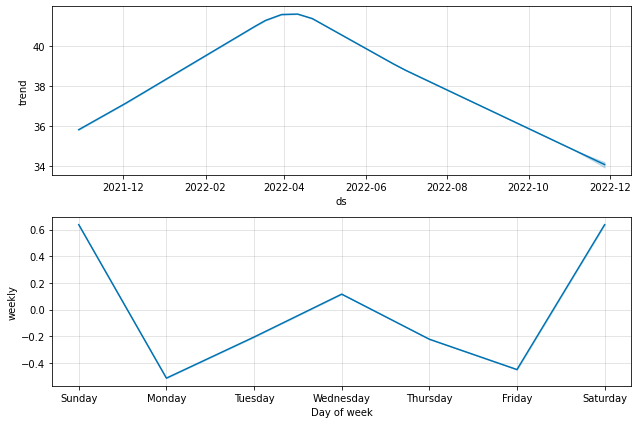

In [ ]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>